## CL_kg for different configurations

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from scipy.interpolate import RectBivariateSpline
sys.path.append("../scripts/") 
from lab import *
import os
params = {'figure.figsize': (6, 4),
         'xtick.labelsize':12,
         'ytick.labelsize':12,
         'lines.linewidth':2}
plt.rcParams.update(params)
stylelabel= 'seaborn-colorblind'

In [117]:
bin_num   = 'all'
bias      = 'simple'
LSST      = False

#### choose settings

In [133]:
z0s       = [1.0,0.7]
sigma_zs  = [0.4,0.2]
z_sources = [z_cmb,1.3]
zmaxs     = [z_cmb,1.5]
chimaxs   = chi_z(zmaxs)



In [134]:
labels=[]

In [135]:
file_exts =[]
for ii in range(len(z0s)):
    z0 = z0s[ii]
    sigma_z = sigma_zs[ii]
    z_source = z_sources[ii]
    zmax = zmaxs[ii]
    chimax = chimaxs[ii]
    if z_source==z_cmb:
        chi_source = chi_cmb
    else:
        chi_source = chi_z(z_source)

    if LSST:
        if chi_source==chi_cmb:
            file_ext = 'lsst%s_cmblens_'%str(bin_num)
        else:
            file_ext = 'lsst%s_deltalens_z%d_'%(str(bin_num),z_source*10)
    else:
        if chi_source==chi_cmb:
            file_ext = 'gaussgal_z%d_sigma%d_cmblens_'%(z0*10,sigma_z*10)
        else:
            file_ext = 'gaussgal_z%d_sigma%d_deltalens_z%d_'%(z0*10,sigma_z*10,z_source*10) 

    file_ext+=bias+'_bias'

    file_ext+=  '_zmax%d'%(zmax*10)
    file_ext2 = 'zmax%d'%(zmax*10)

    print('file extensions for this run:', file_ext,',', file_ext2)


    if bias == 'simple':
        bias_func = simple_bias
    elif bias =='constant':
        bias_func = constant_bias
    else:
        print('no valid bias function selected')

    params = {}
    params['LSST'] = LSST
    params['z0'] = z0
    params['sigma_z'] = sigma_z
    params['bin_num'] = bin_num
    params['chimax'] = chimax
    params['chisource'] = chi_source
    params['zsource'] = z_source
    params['ext'] = file_ext
    params['ext2']= file_ext2
    params['bias']=bias

    try: 
        params_ = pickle.load(open('../settings/params_%s.pkl'%file_ext,'rb'))
        print('parameter file is ../settings/params_%s.pkl'%file_ext)
    except:
        raise ValueError('settings file does not exist.')
    
    if z_source==z_cmb:
        label='$z_{s}=z_{CMB}$, $z_{0}$=%.1f, $\sigma_z$ =%.1f'%(z0, sigma_z)
    else:
        label='$z_{s}$=%.1f, $z_{0}$=%.1f, $\sigma_z$ =%.1f'%(z_source,z0, sigma_z)
    labels+=[label]
    file_exts+=[file_ext]

file extensions for this run: gaussgal_z10_sigma4_cmblens_simple_bias_zmax10886 , zmax10886
parameter file is ../settings/params_gaussgal_z10_sigma4_cmblens_simple_bias_zmax10886.pkl
file extensions for this run: gaussgal_z7_sigma2_deltalens_z13_simple_bias_zmax15 , zmax15
parameter file is ../settings/params_gaussgal_z7_sigma2_deltalens_z13_simple_bias_zmax15.pkl


In [136]:
plotpath = '../plots/%s/4talks/'%file_ext
if os.path.isdir(plotpath):
    print('plot path exists')
else:
    os.makedirs(plotpath)

plot path exists


In [137]:
CLkgs=[]
CLkks=[]
J11s=[]
L = np.logspace(np.log10(min(ell_)),np.log10(max(ell_)/2.),100)

In [138]:
print(file_exts)
print(labels)

['gaussgal_z10_sigma4_cmblens_simple_bias_zmax10886', 'gaussgal_z7_sigma2_deltalens_z13_simple_bias_zmax15']
['$z_{s}=z_{CMB}$, $z_{0}$=1.0, $\\sigma_z$ =0.4', '$z_{s}$=1.3, $z_{0}$=0.7, $\\sigma_z$ =0.2']


#### leading order cross correlation and magnification bias

In [139]:
for ii in range(len(z0s)):
    ell_,Cl_kg   = np.load('../output/cls/Clkg_%s.npy'%(file_exts[ii]))
    ell_,Cl_kk   = np.load('../output/cls/Clkk_%s.npy'%(file_exts[ii]))
    _,J11bare = np.load('../output/cls/ClkgJacobianbare_%s.npy'%(file_exts[ii]))
    CLkgs+=[Cl_kg]
    CLkks+=[Cl_kk]
    J11s+=[J11bare]

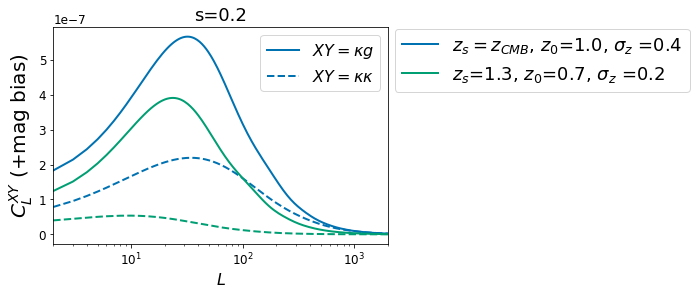

In [140]:
s=0.2
plot_lines=[]
with plt.style.context(stylelabel):
    fig, ax1 = plt.subplots()
    for ii in range(len(z0s)):
        z0 = z0s[ii]
        sigma_z = sigma_zs[ii]
        z_source = z_sources[ii]
        Cl_kg=CLkgs[ii]
        Cl_kk=CLkks[ii]
        J11bare=J11s[ii]
        
        
        if ii==0:
            p,=ax1.semilogx(ell_,J11bare*5.*(s-0.4)+Cl_kg,ls='-', label='$XY=\kappa g$')
            ax1.semilogx(ell_,Cl_kk,ls='--', c=p.get_color(), label = '$XY=\kappa \kappa$')
        else:
            p,=ax1.semilogx(ell_,J11bare*5.*(s-0.4)+Cl_kg,ls='-')
            ax1.semilogx(ell_,Cl_kk,ls='--', c=p.get_color())    
        plot_lines.append(p)
        
    legend1 = plt.legend(plot_lines, labels, loc=(1.02,0.7),fontsize=18)
    plt.gca().add_artist(legend1) 
    
    ax1.set_xlabel('$L$',fontsize=16)
    ax1.set_ylabel('$C_L^{XY}$ (+mag bias)',fontsize=20)
    ax1.set_title(r's=%.1f'%s, fontsize=18)
    ax1.legend(fontsize=16,loc='best')
    ax1.set_xlim(min(ell_),max(ell_))
    fig.savefig(plotpath+'clkg_different_configs_s%d_%s.png'%(10*s,file_ext), bbox_inches='tight',dpi=400)
